# ReThink MediaCloud API User Template
---
This notebook provides a simple, stripped-down version of the user guide that can be easily adjusted and run for different topics. For more in-depth definitions, explanations, and examples for each function, please refer to [the user guide](https://github.com/lana-e/rethink-mediacloud/blob/main/notebooks/ReThink%20MediaCloud%20API%20User%20Guide.ipynb).

This template was created for the user to define everything they need in the first cell, and then run the rest of the notebook with minimal adjustment needed. Arguments can be adjusted and additional function calls can be made as needed, but a user can get meaningful analysis from this pipeline directly out of the box.

In [1]:
# importing functions from rethink_mediacloud_functions.py (MUST BE IN THE SAME FOLDER)
from rethink_mediacloud_functions import *

# defining queries and query labels
# add queries, labels, and dates as necessary
query1 = 'covid OR coronavirus'
query1_label = "COVID-19"
query1_dates = ["11/1/2021", "12/6/2021"]

# defining sources and collections to search for the query
# add sources and collections to dictionaries as needed
sources = {
    "Chicago Tribune": 9,
    "LA Times": 6,
    "Christian Science Monitor": 3,
    "New York Times": 1,
    "The Washington Post": 2,
    "USA Today": 4
}
collections = {"US National Collection": 34412234}

# importing Novetta sources from novetta_sources.json (MUST BE IN THE SAME FOLDER)
import json
with open('novetta_sources.json') as f:
  novetta_sources = json.load(f)

# defining keywords to search within query1, add keywords as needed
keywords = ['omicron']
keyword_labels = ['Omicron']

## Story counts for queries

The cell below uses the `search_sources()` function to calculate the media attention given to the topic defined above.

In [3]:
query1_counts = search_sources(query1, novetta_sources, source_type="media", date_range=query1_dates)
query1_counts.sort_values(by="Relevant Stories", ascending=False).head()

# add more calls for queries and adjust parameters/arguments as necessary

Query: covid OR coronavirus


,Name,Relevant Stories,Total Stories,Attention (%)
MediaCloud ID,,,,
1,New York Times,1577,6581,23.962924
56510,Newsweek,1185,5396,21.960712
1150,The Wall Street Journal,1160,4234,27.397260
1095,CNN Wire,1110,4836,22.952854
158115,The Arizona Republic,930,5918,15.714769


## Keywords within relevant stories

The cell below uses the `calculate_percentages()` function to calculate the percentage of stories relevant to `query1` that contain the keywords defined above.

In [3]:
percentages = calculate_percentages(keywords, sources, source_type="media",
                                    date_range=query1_dates, query_context=query1)

Percentage of stories within specified context that mention:

omicron: 10.85%

All Keywords: 10.85%


## Wordclouds

The cell below uses the `word_cloud()` function to create a wordcloud of common words contained in stories relevant to `query1`.

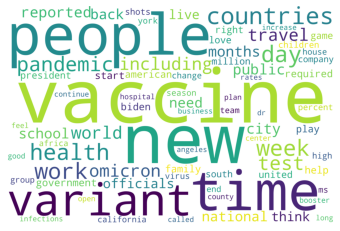

In [4]:
query1_cloud = word_cloud(query1, sources, source_type="media", date_range=query1_dates)

## Attention over time

The cell below uses the `attention_plot()` function to plot the media attention given to `keywords` within stories about `query1` over a specified time period. Feel free to adjust the `query` and `query_context` arguments as needed.

Query 0: omicron


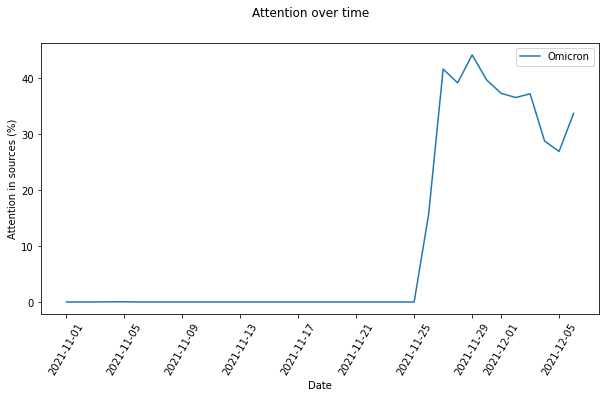

In [5]:
attention_plot = attention_plots(keywords, collections, source_type="collection", date_range=query1_dates,
                                 query_labels=keyword_labels, query_context=query1, verbose=True)

In [ ]:
# Save the test_fig from the cell above as an image. Adjust the img_path and img_name variables as necessary.
img_path = "/home/lana-e/Code/rethink/rethink_mediacloud/notebooks/"
img_name = "attention_plot"
attention_plot.savefig(img_path + img_name, bbox_inches="tight", facecolor="w")